In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [2]:
# load the files 
bead_date =20200713
bead_number = 1
dataset = "/Millicharge/WithSpin0714/"
FOI = "Discharge*"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures/"
filename = dirname + FOI


In [3]:
images =  load_npy_files(dirname+FOI,max_files=10)

/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_0.npy 0
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_1.npy 1
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_2.npy 2
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_3.npy 3
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_4.npy 4
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_5.npy 5
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_6.npy 6
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_7.npy 7
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_8.npy 8
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_9.npy 9


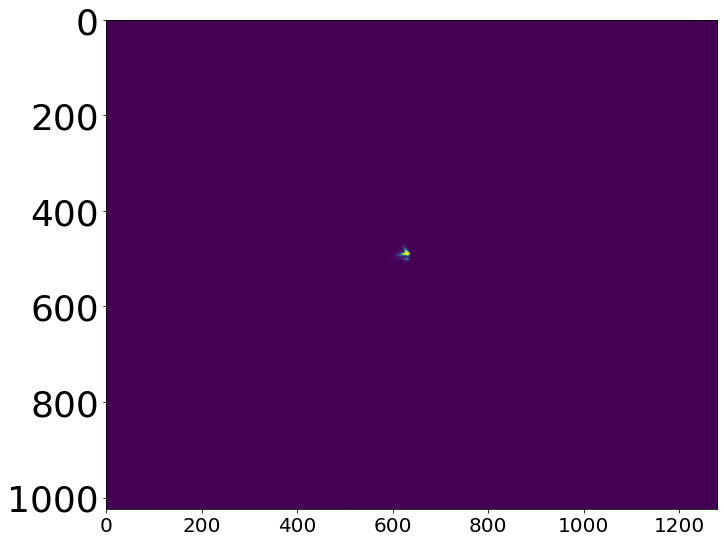

In [4]:
plt.imshow(images[0])

In [5]:
# make a set of offset images with random generation but store the true information
shift_list=[]
offset_images=[]

for i in tqdm(range(10)):
    image = images[0]
    shift = (1/1000*np.random.randn(),1/10*np.random.randn())
    shift_list.append(shift[0])
    offset_image = fourier_shift(np.fft.fftn(image), shift)
    offset_image = np.fft.ifftn(offset_image)
    offset_images.append(offset_image)

100%|██████████| 10/10 [00:02<00:00,  3.48it/s]


In [6]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for offset_image in offset_images:
    gfit = gaussian_bead_pos_fit(np.real(offset_image),axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(offset_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

8.910631656646729


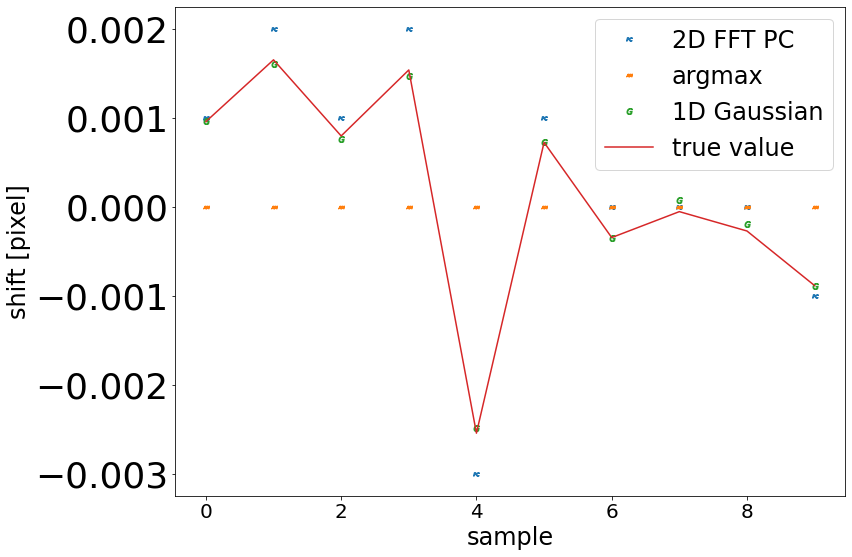

In [7]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")

plt.plot(np.multiply(-1,shift_list),label="true value")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()

In [8]:
# now load an image series and see what happens

images_series =  load_npy_files(dirname+FOI,max_files=100)

/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_0.npy 0
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_1.npy 1
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_2.npy 2
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_3.npy 3
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_4.npy 4
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_5.npy 5
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_6.npy 6
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_7.npy 7
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_8.npy 8
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_9.npy 9
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_10.npy 10
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_11.npy 11


In [9]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_series[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for images in images_series:
    gfit = gaussian_bead_pos_fit(images,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(images,axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, images,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

79.56461691856384


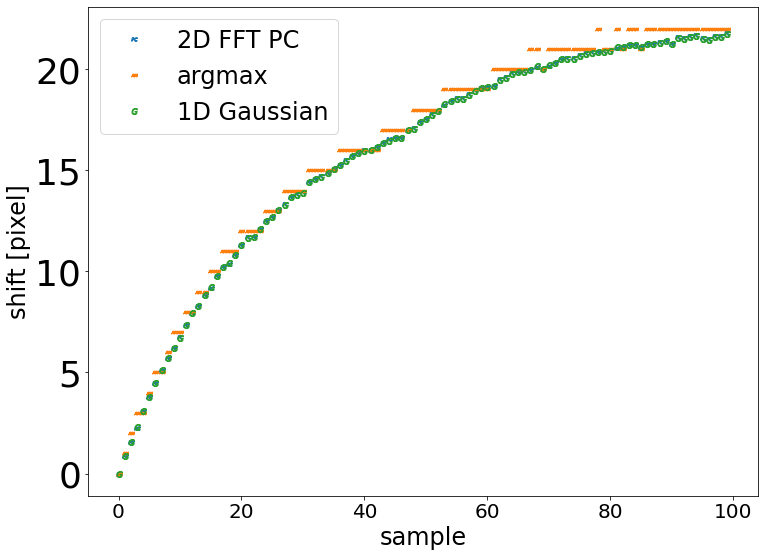

In [10]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")

plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [11]:
"/data/new_trap/20200614/Bead1/Shaking/NoAttractorNoShaking4"

'/data/new_trap/20200614/Bead1/Shaking/NoAttractorNoShaking4'

In [12]:
# load the files 
bead_date =20200614
bead_number = 1
dataset = "Shaking/"
FOI = "NoAttractorNoShaking4*"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/"
filename = dirname + FOI


In [13]:
images_shadow =  load_npy_files(dirname+FOI,max_files=500)

/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_0.npy 0
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_1.npy 1
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_2.npy 2
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_3.npy 3
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_4.npy 4
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_5.npy 5
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_6.npy 6
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_7.npy 7
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_8.npy 8
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_9.npy 9
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_10.npy 10
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_11.npy 11
/data/new_trap/20200614/Bead1/Shaking/Pictures_0

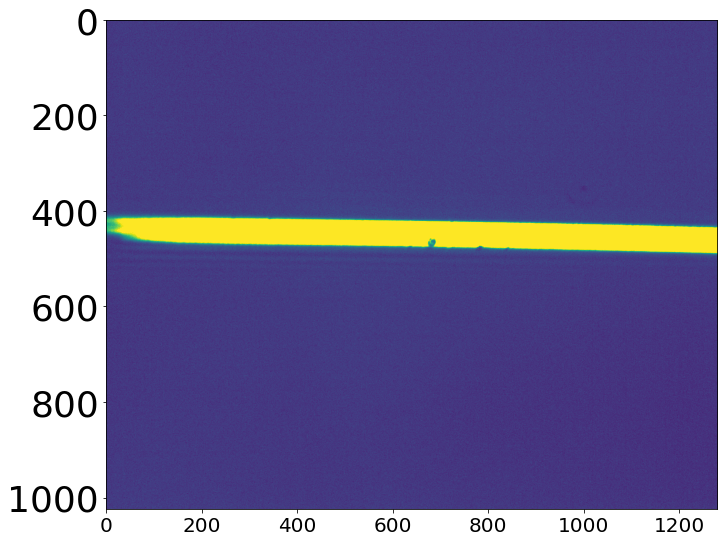

In [14]:
plt.imshow(images_shadow[0])

In [15]:
# make a set of offset images with random generation but store the true information
shift_list=[]
offset_images=[]

for i in tqdm(range(25)):
    image = images_shadow[0]
    shift = (0.01*np.random.randn(),0*np.random.randn())
    shift_list.append(shift[0])
    offset_image = fourier_shift(np.fft.fftn(image), shift)
    offset_image = np.fft.ifftn(offset_image)
    offset_images.append(offset_image)

100%|██████████| 25/25 [00:04<00:00,  4.71it/s]


In [16]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_shadow[0]
m0,_ = from_shadow_image_to_height(image,170,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
for offset_image in offset_images:
    mean, m = from_shadow_image_to_height(np.real(offset_image),175,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
    plt.show()
    gaus_list.append(np.subtract(mean,m0))   
    #argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(offset_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

27.60502576828003


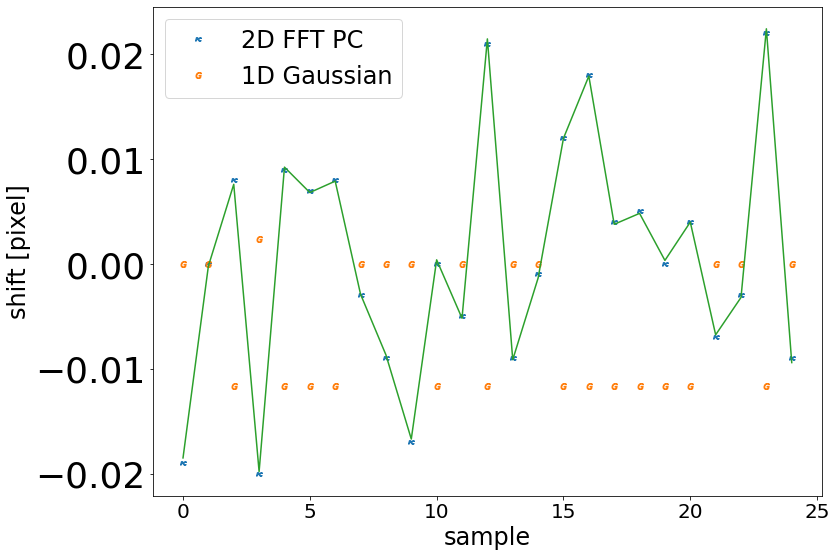

In [17]:
plt.plot(np.multiply(1,shift_z),linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(np.multiply(-1,np.subtract(gaus_list,gaus_list[0])),linestyle="",marker="$G$",label ="1D Gaussian")
plt.plot(np.multiply(-1,shift_list))
#plt.plot(df_H.height_raw[0:100]-df_H.height_raw[0],linestyle="",marker="$H$")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [18]:
df_H = np.load("/data/new_trap_processed/processed_files/20200614/Bead1/Shaking/NoAttractorNoShaking4_aux.pkl",allow_pickle=True)

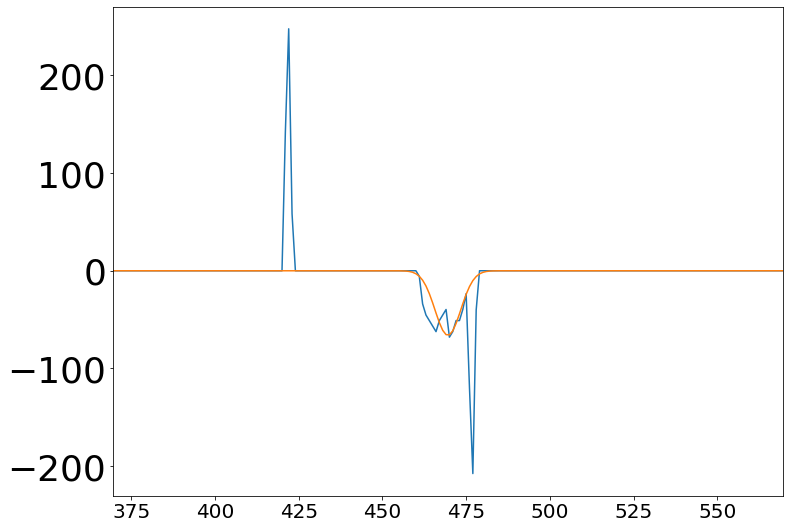

In [19]:
 mean2, m2 = from_shadow_image_to_height(images_shadow[0],170,area_low_limits=[650,730],area_widths=[45,70],plot=True,flb=450)


In [20]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_shadow[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for images in tqdm(images_shadow):
    gfit = gaussian_bead_pos_fit(images,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    mean, m = from_shadow_image_to_height(images,175,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
    #plt.show()
    gaus_list.append(mean)
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(images,axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, images,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

100%|██████████| 500/500 [06:32<00:00,  1.55it/s]

392.3224940299988


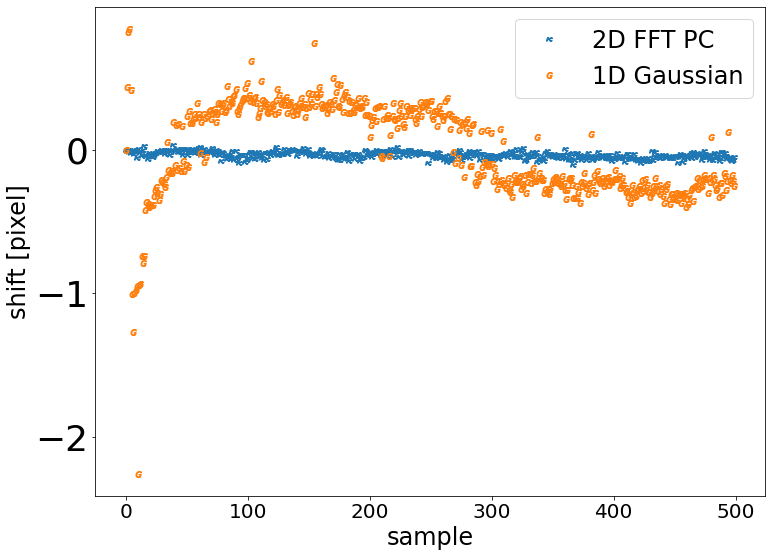

In [21]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(np.subtract(gaus_list,gaus_list[0]),linestyle="",marker="$G$",label ="1D Gaussian")
#plt.plot(df_H.height_raw[0:500]-df_H.height_raw[0],linestyle="",marker="$H$")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [22]:
side2_images = load_npy_files("/data/SC_data/ImageAnalysis/800fps/trial_1/frame_*.npy",max_files=10000)

/data/SC_data/ImageAnalysis/800fps/trial_1/frame_0.npy 0
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_1.npy 1
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_2.npy 2
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_3.npy 3
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_4.npy 4
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_5.npy 5
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_6.npy 6
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_7.npy 7
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_8.npy 8
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_9.npy 9
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_10.npy 10
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_11.npy 11
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_12.npy 12
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_13.npy 13
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_14.npy 14
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_15.npy 15
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_16.npy 16
/data/SC_data/Ima

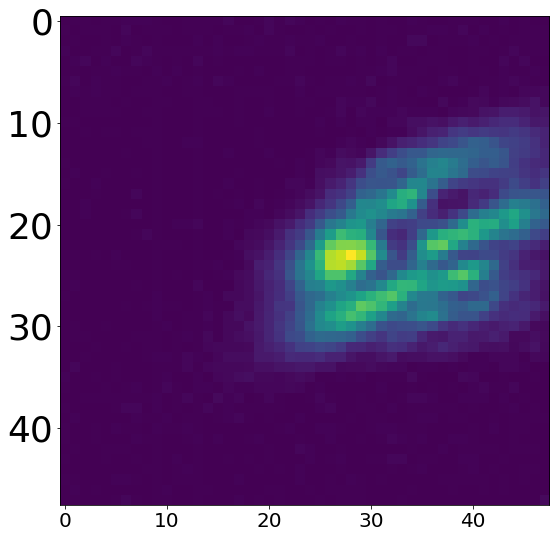

In [23]:
plt.imshow(side2_images[0])

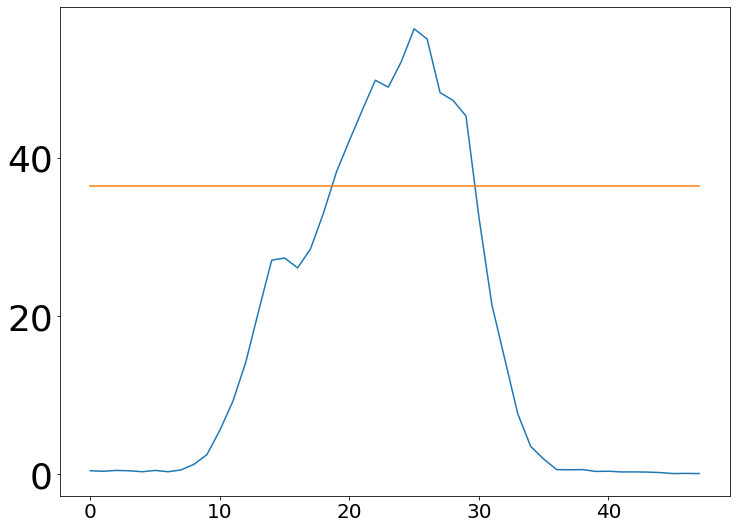

In [24]:
x = np.arange(0,48,1)
plt.plot(np.mean(side2_images[14],axis=1))
plt.plot(x,gaussian(x,params=[gfit[1].values["area"],gfit[1].values["mean"],gfit[1].values["sigma"],gfit[1].values["constant"]]))

In [25]:
start = time.time()
shift_z2 = []
argmax = []
gaus_list = []
image = side2_images[0]
g = gfit = gaussian_bead_pos_fit(side2_images[0],axis=0,low_x_lim=0,up_x_lim=48,low_y_lim=0,up_y_lim=48,upper_area=1000,up_lim_width=12,img_height=48,img_width=48)
for side2_image in tqdm(side2_images):
    gfit = gaussian_bead_pos_fit(side2_image,axis=0,low_x_lim=0,up_x_lim=48,low_y_lim=0,up_y_lim=48,upper_area=1000,up_lim_width=12,img_height=48,img_width=48)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(side2_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, side2_image,
                                                      upsample_factor=1000)
    shift_z2.append(shift[0])
end = time.time()
print(end-start)

100%|██████████| 8000/8000 [16:48<00:00,  9.49it/s]

1008.0843305587769


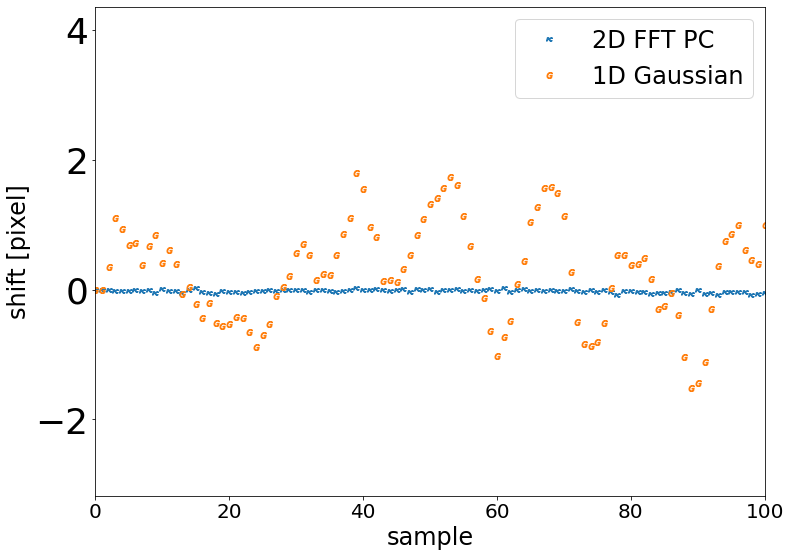

In [26]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
#plt.plot(shift_z2,linestyle="",marker="$PC$", label = "2D FFT PC 2")
#plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")
plt.xlim(0,100)
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()

In [27]:
fft1 = np.fft.rfft(shift_z)
fft = (fft1 * fft1.conj()).real

In [28]:
fft2 = np.fft.rfft(gaus_list)
fft_g = (fft2 * fft2.conj()).real

In [29]:
fft3 = np.fft.rfft(shift_z2)
fft_2 = (fft2 * fft2.conj()).real

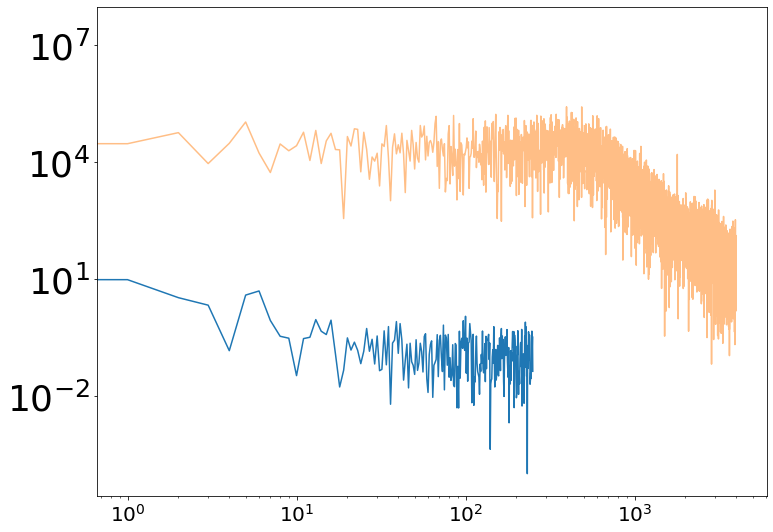

In [30]:
plt.loglog(fft)
plt.loglog(fft_g,alpha=0.5)

In [31]:
fname = "/data/new_trap/20200812/Bead1/InitialTest/Data0.h5"
BDF = BeadDataFile.BeadDataFile(fname)


No height data
No electrodes data
No cantilever data
No laser power data


In [32]:
fft4= np.fft.rfft(BDF.xyz[2])
fft_qpd = (fft4* fft4.conj()).real


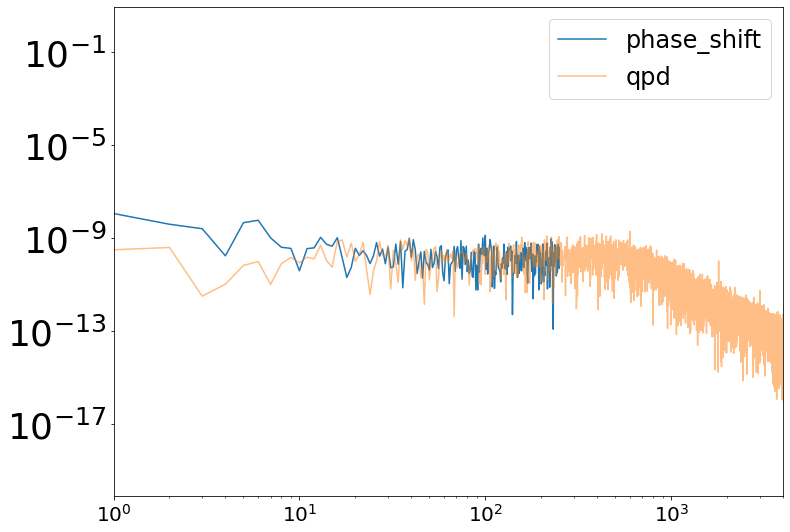

In [33]:
plt.loglog(fft/fft.sum()*5e-7, label = "phase_shift")
#plt.loglog(fft_g/fft_g.sum()*5e-7,alpha=0.5, label = "gaus")
plt.loglog(fft_qpd/fft_qpd.sum(),alpha=0.5, label = "qpd")
plt.xlim(1,4000)
plt.legend()
plt.show()

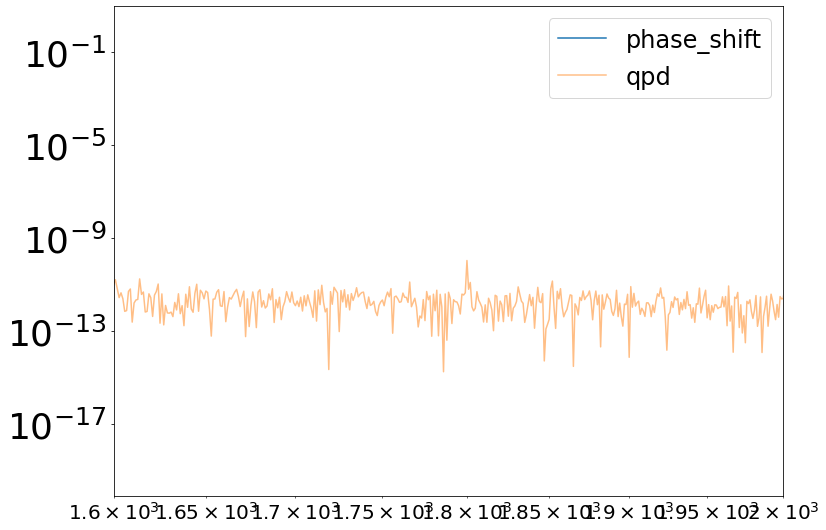

In [34]:
plt.loglog(fft/fft.sum()*5e-7, label = "phase_shift")
#plt.loglog(fft_g/fft_g.sum()*5e-7,alpha=0.5, label = "gaus")
plt.loglog(fft_qpd/fft_qpd.sum(),alpha=0.5, label = "qpd")
plt.xlim(1600,2000)
plt.legend()
plt.show()